<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Kian Omoomi
### Student Number : 98110062
___

The link to the notebook is : https://colab.research.google.com/drive/17aywnJgHfVs__kYLGAkSdl7iiPa4URzl

In [294]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-10 18:23:51--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-10 18:23:51--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb53ead4de6966061b15733b883.dl.dropboxusercontent.com/cd/0/inline/B3_9UgzwPixlOgGb72fgQ2dDV9afCSKtDr5Z67-9wjSwyds5N9n0BJrVe6P0Jw1lAsdmNZXGw_8s62YoQQkNZiyKpf2PtGSZtfd2U2JLFnoF-vJqpQH2ZRuC-0gvtWwRXt77iuFHu-qh_0czXAWtRbm_WR-WnulzfafPYShvrKtCOQ/file# [following]
--2023-03-10 18:23:51--  https://ucb53ead4de6966061b15733b883.dl.dropboxusercontent.com/cd/0/inline/B3_9UgzwPixlOgGb72fgQ2dDV9afCSKtDr5Z67-9wjSwyds5N9n0BJrVe6P0Jw1lAs

In [295]:
# you can use the following libraries
import pandas as pd
import sklearn
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [296]:
df = pd.read_csv('dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


display the top rows of the dataframe (top 5 is enough)

In [297]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


print the names of the columns

In [298]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

what values can the `region` column take? print the unique values using pandas

In [299]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

get the number of rows in the dataset

In [300]:
len(df.index)

1338

make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [301]:
df['rounded_bmi'] = round(df['bmi'])
df

,age,sex,bmi,children,smoker,region,charges,rounded_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,28.0
1,18,male,33.770,1,no,southeast,1725.55230,34.0
2,28,male,33.000,3,no,southeast,4449.46200,33.0
3,33,male,22.705,0,no,northwest,21984.47061,23.0
4,32,male,28.880,0,no,northwest,3866.85520,29.0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31.0
1334,18,female,31.920,0,no,northeast,2205.98080,32.0
1335,18,female,36.850,0,no,southeast,1629.83350,37.0
1336,21,female,25.800,0,no,southwest,2007.94500,26.0


## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

In [302]:
df.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
rounded_bmi    0
dtype: int64

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   rounded_bmi  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [304]:
df.describe()

,age,bmi,children,charges,rounded_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.663677
std,14.049960,6.098187,1.205493,12110.011237,6.096007
min,18.000000,15.960000,0.000000,1121.873900,16.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,35.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


In [305]:
df.nunique()

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
charges        1337
rounded_bmi      36
dtype: int64

## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs

Probably you meant to plot charges against age!

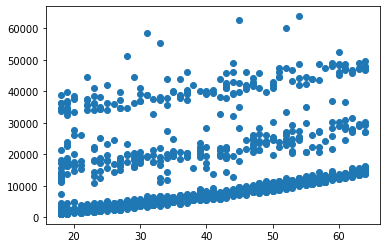

In [306]:
plt.scatter(df['age'], df['charges'])
plt.show()

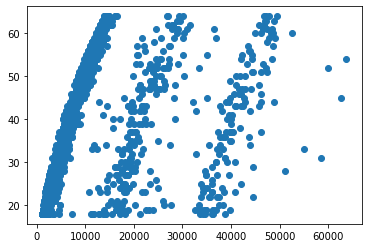

In [307]:
# we can also plot it vice-versa
plt.scatter(df['charges'], df['age'])
plt.show()

print the correlation coefficients matrix

In [308]:
df.corr()

,age,bmi,children,charges,rounded_bmi
age,1.000000,0.109272,0.042469,0.299008,0.109527
bmi,0.109272,1.000000,0.012759,0.198341,0.998920
children,0.042469,0.012759,1.000000,0.067998,0.013915
charges,0.299008,0.198341,0.067998,1.000000,0.198795
rounded_bmi,0.109527,0.998920,0.013915,0.198795,1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [309]:
df_region_ohe = pd.get_dummies(df.region, prefix='region', columns=['region'])
df_region_ohe

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


do the same thing for the `smoker` variable (the result should be a dataframe)

In [310]:
df_smoker_ohe = pd.get_dummies(df.smoker, prefix='smoker', columns=['smoker'])
df_smoker_ohe

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


do the same thing for the `sex` variable (the result should be a dataframe)

In [311]:
df_sex_ohe = pd.get_dummies(df.sex, prefix='is', columns=['sex'])
df_sex_ohe

,is_female,is_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


concatenate these new dataframes with the initial one using pandas

In [312]:
new_df = pd.concat([df[['age', 'bmi', 'children', 'charges', 'rounded_bmi']], df_region_ohe, df_smoker_ohe, df_sex_ohe], axis = 1)
new_df

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,is_female,is_male
0,19,27.900,0,16884.92400,28.0,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,34.0,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,33.0,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,23.0,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,18,31.920,0,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,26.0,0,0,0,1,1,0,1,0


## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [313]:
  from sklearn.preprocessing import MinMaxScaler
  column_names_to_normalize = ['age', 'bmi', 'children']
  x = new_df[column_names_to_normalize].values
  x_scaled = MinMaxScaler().fit_transform(x)
  df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = new_df.index)
  new_df[column_names_to_normalize] = df_temp
  new_df

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,is_female,is_male
0,0.021739,0.321227,0.0,16884.92400,28.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,1725.55230,34.0,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,4449.46200,33.0,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,21984.47061,23.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,26.0,0,0,0,1,1,0,1,0


# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [314]:
new_df_phase3 = new_df.drop(['rounded_bmi', 'charges'], axis=1)
new_df_phase3

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,is_female,is_male
0,0.021739,0.321227,0.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


convert the new dataframe into a numpy array named "x"

In [315]:
 X = new_df_phase3.to_numpy()
 X

array([[0.02173913, 0.3212268 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 1.        ,
        0.        ]])

get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [316]:
 y = new_df['charges'].to_numpy()
 y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [317]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [318]:
class LinearRegression:

    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.hstack((np.ones((n_samples, 1)), X)) 
        X_cross = np.matmul(np.linalg.pinv(np.matmul(X.T, X)), X.T) 
        w = np.matmul(X_cross, y) 
        self.weights = w[1:]
        self.bias = w[0]
        return self
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [319]:
reg_from_scratch = LinearRegression()
reg_from_scratch.fit(x_train, y_train)

In [320]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

get the coefficients of the variables

In [321]:
reg.coef_

array([ 1.15716723e+04,  1.31846350e+04,  2.39678755e+03, -7.64937634e+17,
       -7.64937634e+17, -7.64937634e+17, -7.64937634e+17,  2.19991616e+16,
        2.19991616e+16,  8.69306476e+17,  8.69306476e+17])

In [322]:
reg_from_scratch.weights

array([11702.60320801, 12433.44459115,  2425.13969777,  1585.21989731,
        1236.20877649,   729.39357604,   676.1678022 , -9817.98783301,
       14044.97788504,  2182.7522153 ,  2044.23783674])

get the bias value associated with the model

In [323]:
reg.intercept_

-1.2636800333162971e+17

In [324]:
reg_from_scratch.bias

4226.990052035989

## Sec 5: Save/Load the model

Save

In [325]:
dump(reg, 'regression_model.joblib')

['regression_model.joblib']

Load

In [326]:
reg = load('regression_model.joblib')

# Phase 4: Evaluation

predict the value of "y" for each "x" belonging to the "testing" set

In [327]:
y_predict = reg.predict(x_test)
y_predict

array([ 7.7920e+03, -1.6000e+01,  3.6208e+04,  6.3840e+03,  2.7760e+04,
        1.0608e+04,  1.3920e+03,  6.0000e+03,  1.1632e+04,  6.3840e+03,
        4.7200e+03,  3.7872e+04,  2.1600e+03,  1.0608e+04,  7.0240e+03,
        1.4320e+04,  3.1840e+03,  5.7440e+03,  5.4880e+03,  1.2656e+04,
        7.7920e+03,  6.5120e+03,  3.1600e+04,  1.2528e+04,  3.7616e+04,
        1.0736e+04,  7.0240e+03,  4.9760e+03,  2.0320e+03,  8.1760e+03,
        1.0480e+04,  5.2320e+03,  1.2400e+04,  3.9520e+03,  3.4400e+03,
        1.4960e+04,  8.1760e+03,  1.1120e+04,  2.7248e+04,  1.3920e+03,
        2.6992e+04,  3.0560e+03,  1.0992e+04,  1.3552e+04,  2.9296e+04,
        8.8000e+02,  2.9168e+04,  9.9680e+03,  3.9520e+03,  2.2880e+03,
        2.6992e+04,  1.9040e+03,  1.2784e+04,  1.1248e+04,  1.3552e+04,
        1.5344e+04,  1.4192e+04,  3.6960e+03,  1.6480e+03,  1.3296e+04,
        1.2656e+04,  2.7632e+04,  1.1120e+04,  2.6608e+04,  1.4064e+04,
        8.6880e+03,  3.3264e+04,  1.0992e+04,  1.5088e+04,  3.14

In [328]:
y_predict_from_scratch = reg_from_scratch.predict(x_test)
y_predict_from_scratch

array([ 7733.43635359,   644.23163359, 36611.1020399 ,  6881.67811343,
       27548.79833518,  9238.96791407,  1277.41719996,  5712.12388278,
       11531.83532734,  6745.91627082,  4194.1982647 , 38385.02814242,
        1152.77146281, 11297.07388753,  7504.44492321, 14310.97334985,
        3625.14470745,  5670.89214058,  6224.43078131, 11688.01666505,
        7295.58098902,  6059.85547222, 32351.11359331, 12326.82152968,
       37428.57406434, 11264.37747934,  6570.07741873,  4502.199634  ,
        2614.99761629,  7188.04940981, 10494.90675578,  4754.95893979,
       12191.0142389 ,  3484.57720996,  3988.41787749, 14510.59904466,
        8727.96453114, 11804.96877167, 27780.30080401,   923.73607189,
       26802.09375272,  3696.53627379, 11386.27091322, 13255.46353757,
       30054.78395768,  1571.30139473, 28694.41746493,  9059.56132601,
        4586.12917938,  1960.70976733, 26953.74944294,  2374.10669908,
       13418.93635366, 11725.76318768, 13184.59227543, 14022.47636133,
      

compute the mean squared error

In [329]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

26989501.977472305

In [330]:
mean_squared_error(y_test, y_predict_from_scratch)

26599120.625685256

return the coefficient of determination of the prediction

In [331]:
from sklearn.metrics import r2_score
#both of below approaches are the same

# r2_score(y_test, y_predict)
reg.score(x_test, y_test)

0.7885831611712414

In [332]:
r2_score(y_test, y_predict_from_scratch)

0.7916411350234971

predict the value of "y" only for the last entry of the "testing" set

In [333]:
y_predict_last = reg.predict(x_test[-1].reshape(1, -1))
y_predict_last

array([12528.])

In [334]:
y_predict_from_scratch_last = reg_from_scratch.predict(x_test[-1].reshape(1, -1))
y_predict_from_scratch_last

array([13179.3300522])

# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

In [335]:
df_test = pd.read_csv('assignment1-test-data.csv')
ID_column = df_test['ID']
df_test = df_test.drop('ID', axis=1)
df_test

,age,sex,bmi,children,smoker,region
0,37,female,30.478194,1,no,southeast
1,34,female,46.052982,2,no,southeast
2,63,male,40.342375,0,no,southeast
3,51,female,28.427689,0,no,southwest
4,25,male,16.891723,0,no,northwest
...,...,...,...,...,...,...
95,53,female,28.673546,1,no,northwest
96,38,male,28.637839,4,no,southwest
97,53,female,22.065359,3,no,southwest
98,18,male,26.012596,0,yes,southwest


In [336]:
df_region_ohe_test = pd.get_dummies(df_test.region, prefix='region', columns=['region'])
df_region_ohe_test

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
95,0,1,0,0
96,0,0,0,1
97,0,0,0,1
98,0,0,0,1


In [337]:
df_smoker_ohe_test = pd.get_dummies(df_test.smoker, prefix='smoker', columns=['smoker'])
df_smoker_ohe_test

,smoker_no,smoker_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
95,1,0
96,1,0
97,1,0
98,0,1


In [338]:
df_sex_ohe_test = pd.get_dummies(df_test.sex, prefix='is', columns=['sex'])
df_sex_ohe_test

,is_female,is_male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
95,1,0
96,0,1
97,1,0
98,0,1


In [339]:
new_df_test = pd.concat([df_test[['age', 'bmi', 'children']], df_region_ohe_test, df_smoker_ohe_test, df_sex_ohe_test], axis = 1)
new_df_test

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,is_female,is_male
0,37,30.478194,1,0,0,1,0,1,0,1,0
1,34,46.052982,2,0,0,1,0,1,0,1,0
2,63,40.342375,0,0,0,1,0,1,0,0,1
3,51,28.427689,0,0,0,0,1,1,0,1,0
4,25,16.891723,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,53,28.673546,1,0,1,0,0,1,0,1,0
96,38,28.637839,4,0,0,0,1,1,0,0,1
97,53,22.065359,3,0,0,0,1,1,0,1,0
98,18,26.012596,0,0,0,0,1,0,1,0,1


In [340]:
  column_names_to_normalize = ['age', 'bmi', 'children']
  x = new_df_test[column_names_to_normalize].values
  x_scaled = MinMaxScaler().fit_transform(x)
  df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = new_df_test.index)
  new_df_test[column_names_to_normalize] = df_temp
  new_df_test

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,is_female,is_male
0,0.434783,0.445223,0.2,0,0,1,0,1,0,1,0
1,0.369565,0.955602,0.4,0,0,1,0,1,0,1,0
2,1.000000,0.768468,0.0,0,0,1,0,1,0,0,1
3,0.739130,0.378029,0.0,0,0,0,1,1,0,1,0
4,0.173913,0.000000,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.782609,0.386085,0.2,0,1,0,0,1,0,1,0
96,0.456522,0.384915,0.8,0,0,0,1,1,0,0,1
97,0.782609,0.169538,0.6,0,0,0,1,1,0,1,0
98,0.021739,0.298887,0.0,0,0,0,1,0,1,0,1


In [341]:
X_test = new_df_test.to_numpy()
X_test

array([[0.43478261, 0.445223  , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.36956522, 0.95560231, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.7684681 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7826087 , 0.16953789, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.2988872 , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.2173913 , 0.16432262, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [342]:
y_predict_test = reg_from_scratch.predict(X_test)
y_predict_test

array([ 8429.91977595, 14497.50735483, 18439.94235842, 10617.87273086,
        -275.31582722, 40685.41250134, 25999.23926401,  7353.18656555,
        1229.34462319, 11897.54953015, 12204.70161693, 31356.18644315,
        7679.45532643, 31715.72933595,  7988.81736506,  8577.6872848 ,
       11761.99075485,  5318.04816587, 12422.09168915, 10320.63428164,
       -1940.52291227, 40803.38812066,  9064.06137504,  9280.51827926,
        4691.33861082, 12382.81819783,  6723.47532182, 41347.15273521,
         208.33525426,  1371.90646329, 38108.71881515,  3609.3363665 ,
       15299.04121337,  1580.90789247,   977.52689056,  8054.47864485,
        9608.44797313,  1174.96584448, 12547.24173692, 42146.70997045,
       10778.37008228,  8287.18001748, 19134.5042173 , 12854.94001368,
       37304.71267702, 14329.13761774, 36361.23676573,  5640.61691362,
       13041.69111389,  8710.52248312, 42021.45264854, 11116.07383463,
        6927.59997852, 39676.10949604, 12172.13202949, 35553.2470123 ,
      

In [343]:
final_df = pd.DataFrame({'ID': ID_column, 
                         'charges': y_predict_test})
final_df.to_csv('submission2.csv', index=False)